<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

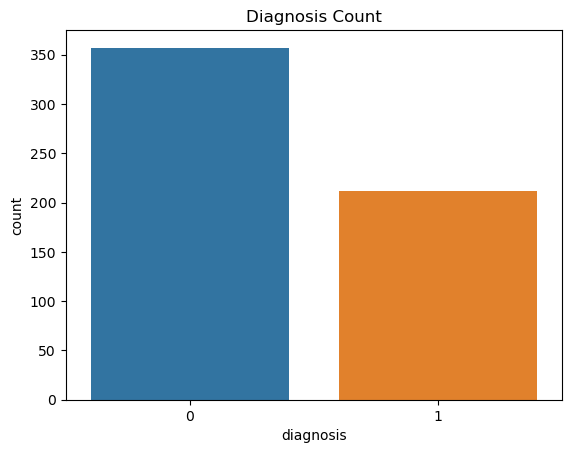

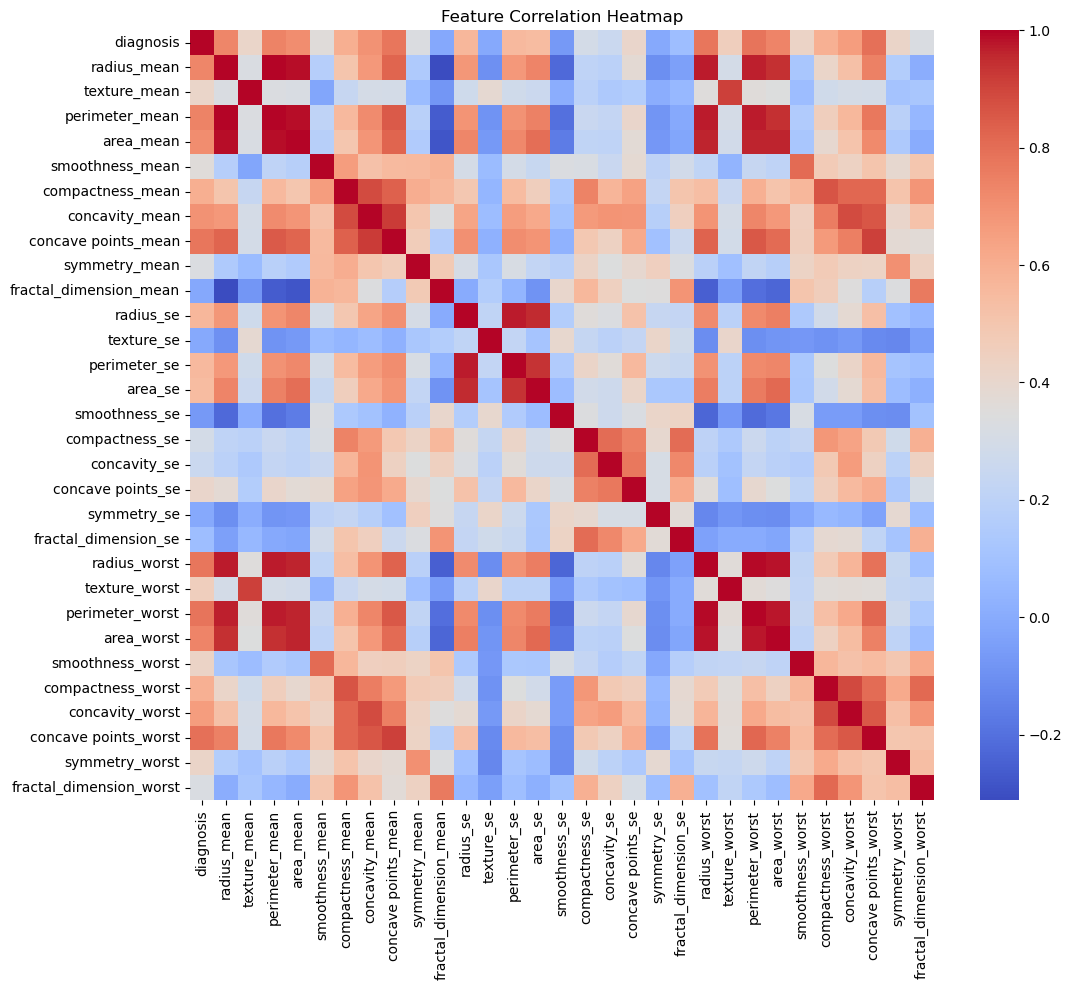

Accuracy: 0.9736842105263158

Confusion Matrix:
 [[70  1]
 [ 2 41]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 1: Load the Dataset
data = pd.read_csv('Cancer_Data.csv')
data.head()

# Step 2: Explore the Dataset
print(data.info())
print(data.describe())
print(data['diagnosis'].value_counts())

# Step 3: Clean the Data
data = data.drop(['Unnamed: 32', 'id'], axis=1)
data['diagnosis'] = data['diagnosis'].map({'M':1, 'B':0})

# Step 4: Visualize the Data
sns.countplot(x='diagnosis', data=data)
plt.title('Diagnosis Count')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# Step 5: Preprocess the Data
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 6: Build & Train Model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Step 7: Evaluate the Model
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))